## 01 Import Libraries
## 02 Import Data
## 03 Explore Data
## 04 Visualization Work
## 05 Crosstabs exported to Excel
## 06 New Variable - Parental Status
### - Continue Crosstabs
## 07 Price Data and addt'l Viz

# 01 Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
# import data
path = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A4 - Python Fundamentals for Data Analysts\02-2022 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'opcd.pkl'))

# 03 Explore Data

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_dspo,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,active_cust_flag,department,Generation,IncomeClass
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,regularly busy,regularly busy time,10,new customer,6.367797,low spender,20.5,non-freq cust,Female,Alabama,31,2/17/2019,3,married,40423,South,active,beverages,Millenial(26-41),low_income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,least busy,regularly busy time,10,new customer,6.367797,low spender,20.5,non-freq cust,Female,Alabama,31,2/17/2019,3,married,40423,South,active,beverages,Millenial(26-41),low_income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,least busy,regularly busy time,10,new customer,6.367797,low spender,20.5,non-freq cust,Female,Alabama,31,2/17/2019,3,married,40423,South,active,beverages,Millenial(26-41),low_income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,least busy,regularly busy time,10,new customer,6.367797,low spender,20.5,non-freq cust,Female,Alabama,31,2/17/2019,3,married,40423,South,active,beverages,Millenial(26-41),low_income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,least busy,busiest time,10,new customer,6.367797,low spender,20.5,non-freq cust,Female,Alabama,31,2/17/2019,3,married,40423,South,active,beverages,Millenial(26-41),low_income


# 04 Visualizations

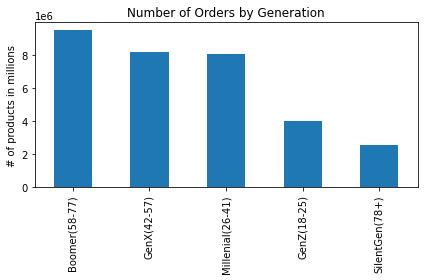

In [5]:
bar_gen=df['Generation'].value_counts().plot.bar()
plt.title('Number of Orders by Generation')
plt.ylabel('# of products in millions')
plt.tight_layout()

In [6]:
bar_gen.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_gen_better.jpg'))

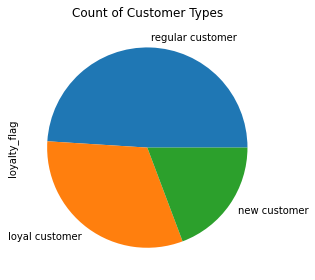

In [7]:
pie_loyalty=df['loyalty_flag'].value_counts().plot.pie()
plt.title('Count of Customer Types')
plt.tight_layout()

In [8]:
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.jpg'))

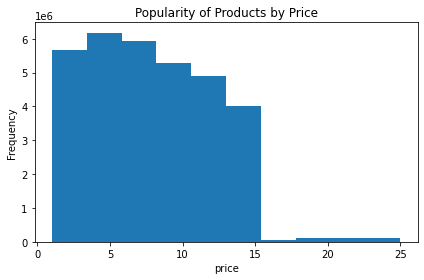

In [9]:
hist_price2=df['prices'].plot.hist(bins=10)
plt.title('Popularity of Products by Price')
plt.xlabel('price')
plt.tight_layout()

In [10]:
hist_price2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_price2.jpg'))

# 05 Crosstabs

In [11]:
df['order_freq_flag'].value_counts(dropna=False)

freq cust        21559853
reg cust          7208564
non-freq cust     3636437
NaN                     5
Name: order_freq_flag, dtype: int64

In [12]:
crosstab=pd.crosstab(df['order_freq_flag'], df['IncomeClass'], dropna = False)

In [13]:
crosstab.to_clipboard()

In [14]:
crosstab2=pd.crosstab(df['loyalty_flag'], df['days_since_prior_order'], dropna = False)

In [15]:
crosstab2.to_clipboard()

In [16]:
crosstab3=pd.crosstab(df['Generation'], df['department'], dropna=False)

In [17]:
crosstab3.to_clipboard()

## Create a variable for parental status

In [18]:
# create a variable for parental status
df.loc[(df['n_dependants']==0),'ParentalStatus']='not a parent'

In [19]:
df.loc[(df['n_dependants']>0),'ParentalStatus']='parent'

In [20]:
df['ParentalStatus'].value_counts(dropna=False)

parent          24307356
not a parent     8097503
Name: ParentalStatus, dtype: int64

In [21]:
crosstab4=pd.crosstab(df['ParentalStatus'], df['department'], dropna=False)

In [22]:
crosstab4.to_clipboard()

In [23]:
crosstab5=pd.crosstab(df['IncomeClass'], df['department'], dropna=False)

In [24]:
crosstab5.to_clipboard()

In [25]:
crosstab6=pd.crosstab(df['prices'], df['Generation'], dropna=False)

In [26]:
crosstab6.to_clipboard()

In [27]:
df.loc[(df['prices']<5), 'PriceRange']='less than 5'

In [28]:
df.loc[(df['prices']>=5) & (df['prices']<10), 'PriceRange']='5-9.99'

In [29]:
df.loc[(df['prices']>=10) & (df['prices']<15), 'PriceRange']='10-14.99'

In [30]:
df.loc[(df['prices']>=15) & (df['prices']<20), 'PriceRange']='15-19.99'

In [31]:
df.loc[(df['prices']>=20), 'PriceRange']='20+'

In [32]:
# this includes the 2%milk and cottage cheese that were priced crazy in the NaN values: OK!
df['PriceRange'].value_counts(dropna=False)

5-9.99         11860520
10-14.99       10128983
less than 5     9900417
15-19.99         276816
20+              232996
NaN                5127
Name: PriceRange, dtype: int64

In [33]:
crosstab7=pd.crosstab(df['order_freq_flag'], df['PriceRange'])

In [34]:
crosstab7.to_clipboard()

## 07 Price Data and Visualization

In [35]:
df['prices'].value_counts(dropna=False).sort_index()

1.0     115143
1.1     242782
1.2     256258
1.3     425691
1.4     392209
         ...  
24.7      7283
24.8       410
24.9      5781
25.0     13772
NaN       5127
Name: prices, Length: 241, dtype: int64

In [36]:
df['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [37]:
df['prices'].value_counts(dropna=False).sort_index().tail(20)

23.2    14866
23.3     4803
23.4      368
23.5     1924
23.6     8458
23.7     1346
23.8    12585
23.9     2074
24.0     4327
24.1      978
24.2    15891
24.3     2889
24.4      499
24.5     2148
24.6     1962
24.7     7283
24.8      410
24.9     5781
25.0    13772
NaN      5127
Name: prices, dtype: int64

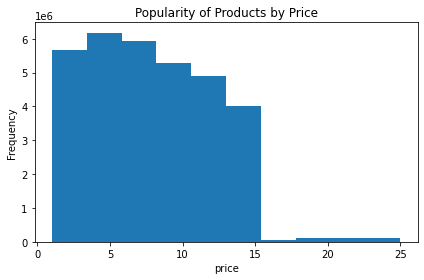

In [38]:
hist_price2=df['prices'].plot.hist(bins=10)
plt.title('Popularity of Products by Price')
plt.xlabel('price')
plt.tight_layout()

In [39]:
hist_price2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_price2.jpg'))

In [40]:
crosstab8=pd.crosstab(df['Gender'], df['department'], dropna=False)

In [41]:
crosstab8.to_clipboard()

In [42]:
crosstab9=pd.crosstab(df['ParentalStatus'], df['PriceRange'], dropna=False)

In [43]:
crosstab9.to_clipboard()

In [44]:
crosstab=pd.crosstab(df['IncomeClass'], df['PriceRange'], dropna=False)

In [45]:
crosstab.to_clipboard()